In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
%pwd

'c:\\Users\\Amreet\\Desktop\\Skin-Cancer-Classification\\research'

In [4]:
dataset_df = pd.read_csv('../Source/HAM10000_metadata_part1.csv')
dataset_df.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,cell_type,cell_type_idx
0,HAM_0007180,ISIC_0033272,mel,histo,65.0,male,face,C://Users//Amreet//Desktop//Skin-Cancer-Classi...,Melanoma,5
1,HAM_0007195,ISIC_0031923,nv,histo,40.0,female,lower extremity,C://Users//Amreet//Desktop//Skin-Cancer-Classi...,Melanocytic nevi,4
2,HAM_0001835,ISIC_0026652,mel,histo,65.0,male,back,C://Users//Amreet//Desktop//Skin-Cancer-Classi...,Melanoma,5
3,HAM_0000465,ISIC_0030583,bkl,consensus,35.0,female,trunk,C://Users//Amreet//Desktop//Skin-Cancer-Classi...,Benign keratosis-like lesions,2
4,HAM_0001720,ISIC_0034010,nv,histo,45.0,male,abdomen,C://Users//Amreet//Desktop//Skin-Cancer-Classi...,Melanocytic nevi,4
5,HAM_0006333,ISIC_0024424,nv,histo,35.0,male,trunk,C://Users//Amreet//Desktop//Skin-Cancer-Classi...,Melanocytic nevi,4
6,HAM_0004548,ISIC_0032832,nv,histo,45.0,female,upper extremity,C://Users//Amreet//Desktop//Skin-Cancer-Classi...,Melanocytic nevi,4
7,HAM_0006526,ISIC_0026671,nv,histo,55.0,male,lower extremity,C://Users//Amreet//Desktop//Skin-Cancer-Classi...,Melanocytic nevi,4
8,HAM_0003102,ISIC_0032389,mel,histo,65.0,male,face,C://Users//Amreet//Desktop//Skin-Cancer-Classi...,Melanoma,5
9,HAM_0004260,ISIC_0025525,nv,histo,65.0,male,back,C://Users//Amreet//Desktop//Skin-Cancer-Classi...,Melanocytic nevi,4


In [9]:
dataset_df['age'].fillna((dataset_df['age'].mean()), inplace=True)   # Replacing all the missing values with the mean values

# checking again for the missing values present or not
dataset_df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
image_path       0
cell_type        0
cell_type_idx    0
dtype: int64

In [10]:
from sklearn.utils import resample

In [11]:
df_bkl = dataset_df[dataset_df['dx']=='bkl']
df_nv = dataset_df[dataset_df['dx']=='nv']
df_df = dataset_df[dataset_df['dx']=='df']
df_mel = dataset_df[dataset_df['dx']=='mel']
df_vasc = dataset_df[dataset_df['dx']=='vasc']
df_bcc = dataset_df[dataset_df['dx']=='bcc']
df_akiec = dataset_df[dataset_df['dx']=='akiec']
n_samples = 500
df_bkl_balanced = resample(df_bkl, replace =True, n_samples=n_samples, random_state=42)
df_nv_balanced = resample(df_nv, replace =True, n_samples=n_samples, random_state=42)
df_df_balanced = resample(df_df, replace =True, n_samples=n_samples, random_state=42)
df_mel_balanced = resample(df_mel, replace =True, n_samples=n_samples, random_state=42)
df_vasc_balanced = resample(df_vasc, replace =True, n_samples=n_samples, random_state=42)
df_bcc_balanced = resample(df_bcc, replace =True, n_samples=n_samples, random_state=42)
df_akiec_balanced = resample(df_akiec, replace =True, n_samples=n_samples, random_state=42)

disease_df = pd.concat([df_bkl_balanced, df_nv_balanced, df_df_balanced, df_mel_balanced, df_vasc_balanced, df_bcc_balanced, df_akiec_balanced])

In [12]:
print("Details regarding the Dataset")
disease_df.info()
print("Shape of the Dataset -- ",disease_df.shape)

Details regarding the Dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 824 to 4521
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lesion_id      3500 non-null   object 
 1   image_id       3500 non-null   object 
 2   dx             3500 non-null   object 
 3   dx_type        3500 non-null   object 
 4   age            3500 non-null   float64
 5   sex            3500 non-null   object 
 6   localization   3500 non-null   object 
 7   image_path     3500 non-null   object 
 8   cell_type      3500 non-null   object 
 9   cell_type_idx  3500 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 300.8+ KB
Shape of the Dataset --  (3500, 10)


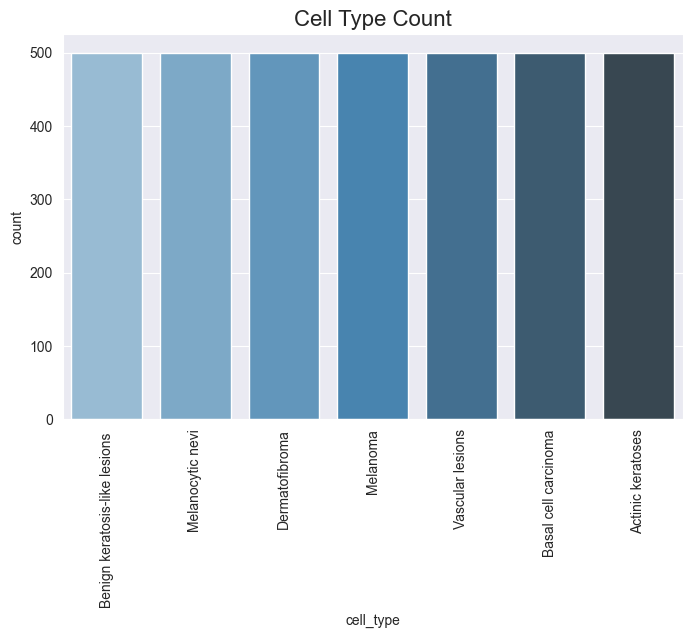

Benign keratosis-like lesions     500
Melanocytic nevi                  500
Dermatofibroma                    500
Melanoma                          500
Vascular lesions                  500
Basal cell carcinoma              500
Actinic keratoses                 500
Name: cell_type, dtype: int64


In [13]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
sns.countplot(x = disease_df['cell_type'], #cell_type
                     order = disease_df['cell_type'].value_counts().index, #cell_type
                     palette= "Blues_d")
plt.xticks(rotation = 90) 
plt.title('Cell Type Count',fontsize=16) 
plt.show()
print(disease_df['cell_type'].value_counts())

In [14]:
from PIL import Image
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [15]:
disease_df['image'] = disease_df['image_path'].map(lambda x: np.asarray(Image.open(x).resize((160,120))))
print(disease_df['image'].map(lambda x: x.shape))

824     (120, 160, 3)
3837    (120, 160, 3)
2363    (120, 160, 3)
892     (120, 160, 3)
606     (120, 160, 3)
            ...      
3115    (120, 160, 3)
855     (120, 160, 3)
2979    (120, 160, 3)
4576    (120, 160, 3)
4521    (120, 160, 3)
Name: image, Length: 3500, dtype: object


In [16]:
disease_df['image'].map(lambda x: x.shape).value_counts()

(120, 160, 3)    3500
Name: image, dtype: int64

In [17]:
features=disease_df.drop(columns=['cell_type_idx'],axis=1)  # removing the column from the dataset
target=disease_df['cell_type_idx']                                  # setting that column as the target variable

In [18]:
from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(features, target, test_size=0.20,random_state=1234)
# Training is 80 % and testing is 20 %

In [19]:
x_train = np.asarray(x_train_1['image'].tolist())
x_test = np.asarray(x_test_1['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [20]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train_1, num_classes = 7)
y_test = to_categorical(y_test_1, num_classes = 7)

In [21]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.13, random_state = 2)

In [23]:
# Reshape image in 3 dimensions (height = 75px, width = 100px , num_channels = 3)
x_train = x_train.reshape(x_train.shape[0], *(120, 160, 3))
x_test = x_test.reshape(x_test.shape[0], *(120, 160, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(120, 160, 3))

print('x_train : ',x_train.shape)
print('y_train : ',y_train.shape)
print('x_test : ',x_test.shape)
print('x-validate : ',x_validate.shape)

x_train :  (2436, 120, 160, 3)
y_train :  (2436, 7)
x_test :  (700, 120, 160, 3)
x-validate :  (364, 120, 160, 3)


In [24]:
# Set the GPU device
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    tf.config.experimental.set_visible_devices(physical_devices[0], 'GPU')

In [25]:
import keras
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers.core import Dropout, Activation
from keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Flatten,Dense

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization, concatenate, AveragePooling2D

model = Sequential([
    
    # 1st convolutional layer
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(120, 160,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    # 2nd convolutional layer
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    # 3rd convolutional layer
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    
    # 4th convolutional layer
    Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    
    # 5th convolutional layer
    Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    Flatten(),
    
    # 6th, Dense layer
    Dense(4096, activation='relu'),
    Dropout(0.5),
    
    # 7th Dense layer
    Dense(4096, activation='relu'),
    Dropout(0.5),
    
    # 8th output layer
    Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 38, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 38, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 18, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 18, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 18, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 8, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 8, 384)         8

In [27]:
from tensorflow.keras.optimizers import Adam
# Define the optimizer
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-3, decay=0.0, amsgrad=False)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [30]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy', 
    patience=4, # 3
    verbose=1, 
    factor=0.5, 
    # factor=0.3,
    min_lr=0.0000001)

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# data augmentation added to help reduce overfitting
train_datagen = ImageDataGenerator(
    rotation_range = 20, # 45, 90                 
    width_shift_range = 0.2,  # 0.1                
    height_shift_range = 0.2, # 0.1                                   
    shear_range = 0.1, # 0.2                 
    zoom_range = 0.1, # 0.2, 0.3                    
    horizontal_flip = True,
    #rescale = 1./255
    #vertical_flip=True,
)

Epoch 1/30
76/76 [==============================] - 9s 117ms/step - loss: 0.5838 - accuracy: 0.7853 - val_loss: 0.6143 - val_accuracy: 0.7912
Epoch 2/30
76/76 [==============================] - 9s 117ms/step - loss: 0.5607 - accuracy: 0.7869 - val_loss: 0.5202 - val_accuracy: 0.8159
Epoch 3/30
76/76 [==============================] - 9s 117ms/step - loss: 0.5763 - accuracy: 0.7898 - val_loss: 0.5364 - val_accuracy: 0.8022
Epoch 4/30
76/76 [==============================] - 9s 114ms/step - loss: 0.5584 - accuracy: 0.7943 - val_loss: 0.5390 - val_accuracy: 0.8214
Epoch 5/30
76/76 [==============================] - 9s 117ms/step - loss: 0.5409 - accuracy: 0.8017 - val_loss: 0.5352 - val_accuracy: 0.8214
Epoch 6/30
76/76 [==============================] - 9s 118ms/step - loss: 0.5289 - accuracy: 0.8005 - val_loss: 0.5215 - val_accuracy: 0.7857
Epoch 7/30
76/76 [==============================] - 9s 117ms/step - loss: 0.5361 - accuracy: 0.8042 - val_loss: 0.5762 - val_accuracy: 0.7857
Epoch 

<Axes: >

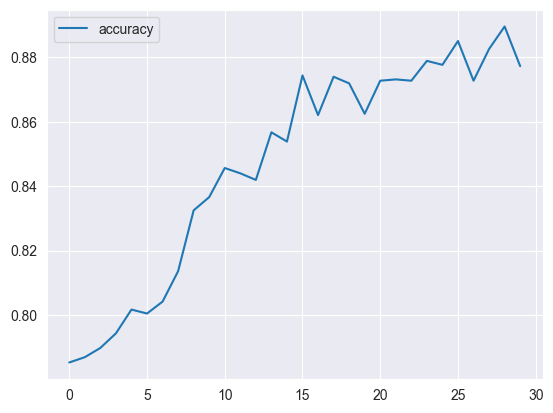

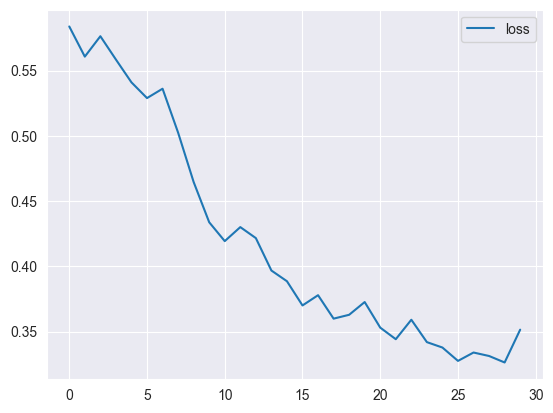

In [34]:
Epochs=30
batchSize=32

with tf.device('/GPU:0'):
    history = model.fit(train_datagen.flow(x_train,y_train, batch_size=batchSize),
                              epochs = Epochs, validation_data = (x_validate,y_validate),  
                              verbose = 1, steps_per_epoch=x_train.shape[0] / batchSize, 
                              callbacks=[learning_rate_reduction])

print('----------------------------------------------------------')

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy']].plot()
history_df.loc[:, ['loss']].plot()

In [35]:
scores = model.evaluate(x_test, y_test, verbose=2)

print('CNN Error: %.2f%%' % ((100 - scores[1] * 100)))
print('CNN Acc: %.2f%%' % (scores[1] * 100))
final_loss, final_acc = model.evaluate(x_test, y_test, verbose=0)
print("Final loss: {0:.4f}".format(final_loss))

y_pred = model.predict(x_test)

22/22 - 0s - loss: 0.4659 - accuracy: 0.8400
CNN Error: 16.00%
CNN Acc: 84.00%
Final loss: 0.4659


In [36]:
history_df.to_csv('../models/Reports/cnn_1_history_Adam.csv')


In [37]:
model.save("../models/H5_Format/model_cnn_adam1.h5")

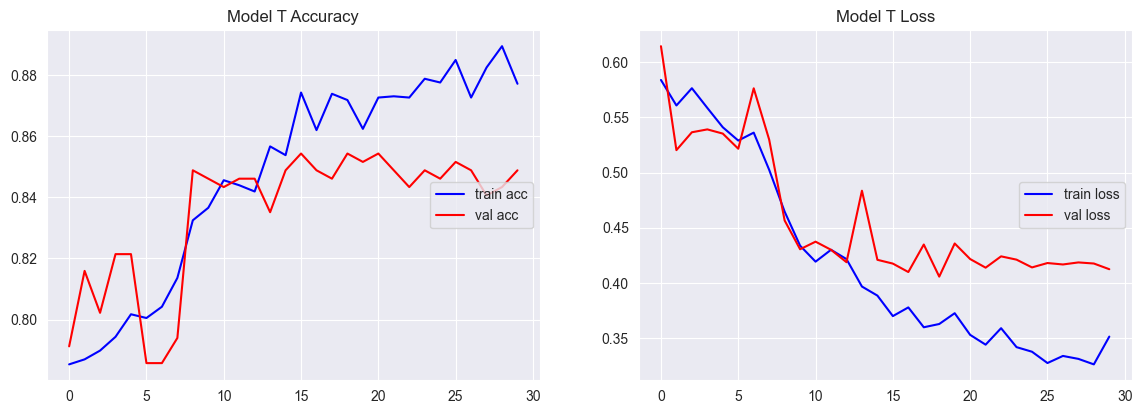

In [38]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'], 'b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], 'r', label="Validation accuracy")
plt.legend(['train acc', 'val acc'], loc='center right')
plt.title('Model T Accuracy')

plt.subplot(2,2,2)
plt.plot(history.history['loss'], 'b', label= "Training loss")
plt.plot(history.history['val_loss'], 'r', label="validation loss")
plt.legend(['train loss', 'val loss'], loc='center right')
plt.title('Model T Loss')
plt.show()

In [40]:
best_model = load_model('../models/H5_Format/model_cnn_adam1.h5')

# compute predictions
with tf.device('/GPU:0'):
    y_pred_prob = np.around(best_model.predict(x_test),7)
    y_pred = np.argmax(y_pred_prob,axis=1)

y_true = np.argmax(y_test, axis=1)

In [41]:
lesion_names = ['Melanocytic nevi','Melanoma','Benign keratosis-like lesions ',
               'Basal cell carcinoma','Actinic keratoses','Vascular lesions',
               'Dermatofibroma']

lesion_names_short = ['nv','mel','bkl','bcc','akiec','vasc','df']

targetNames = ['Actinic keratoses', 'Basal cell carcinoma','Benign keratosis-like lesions', 
                'Dermatofibroma','Melanocytic nevi','Melanoma','Vascular lesions']

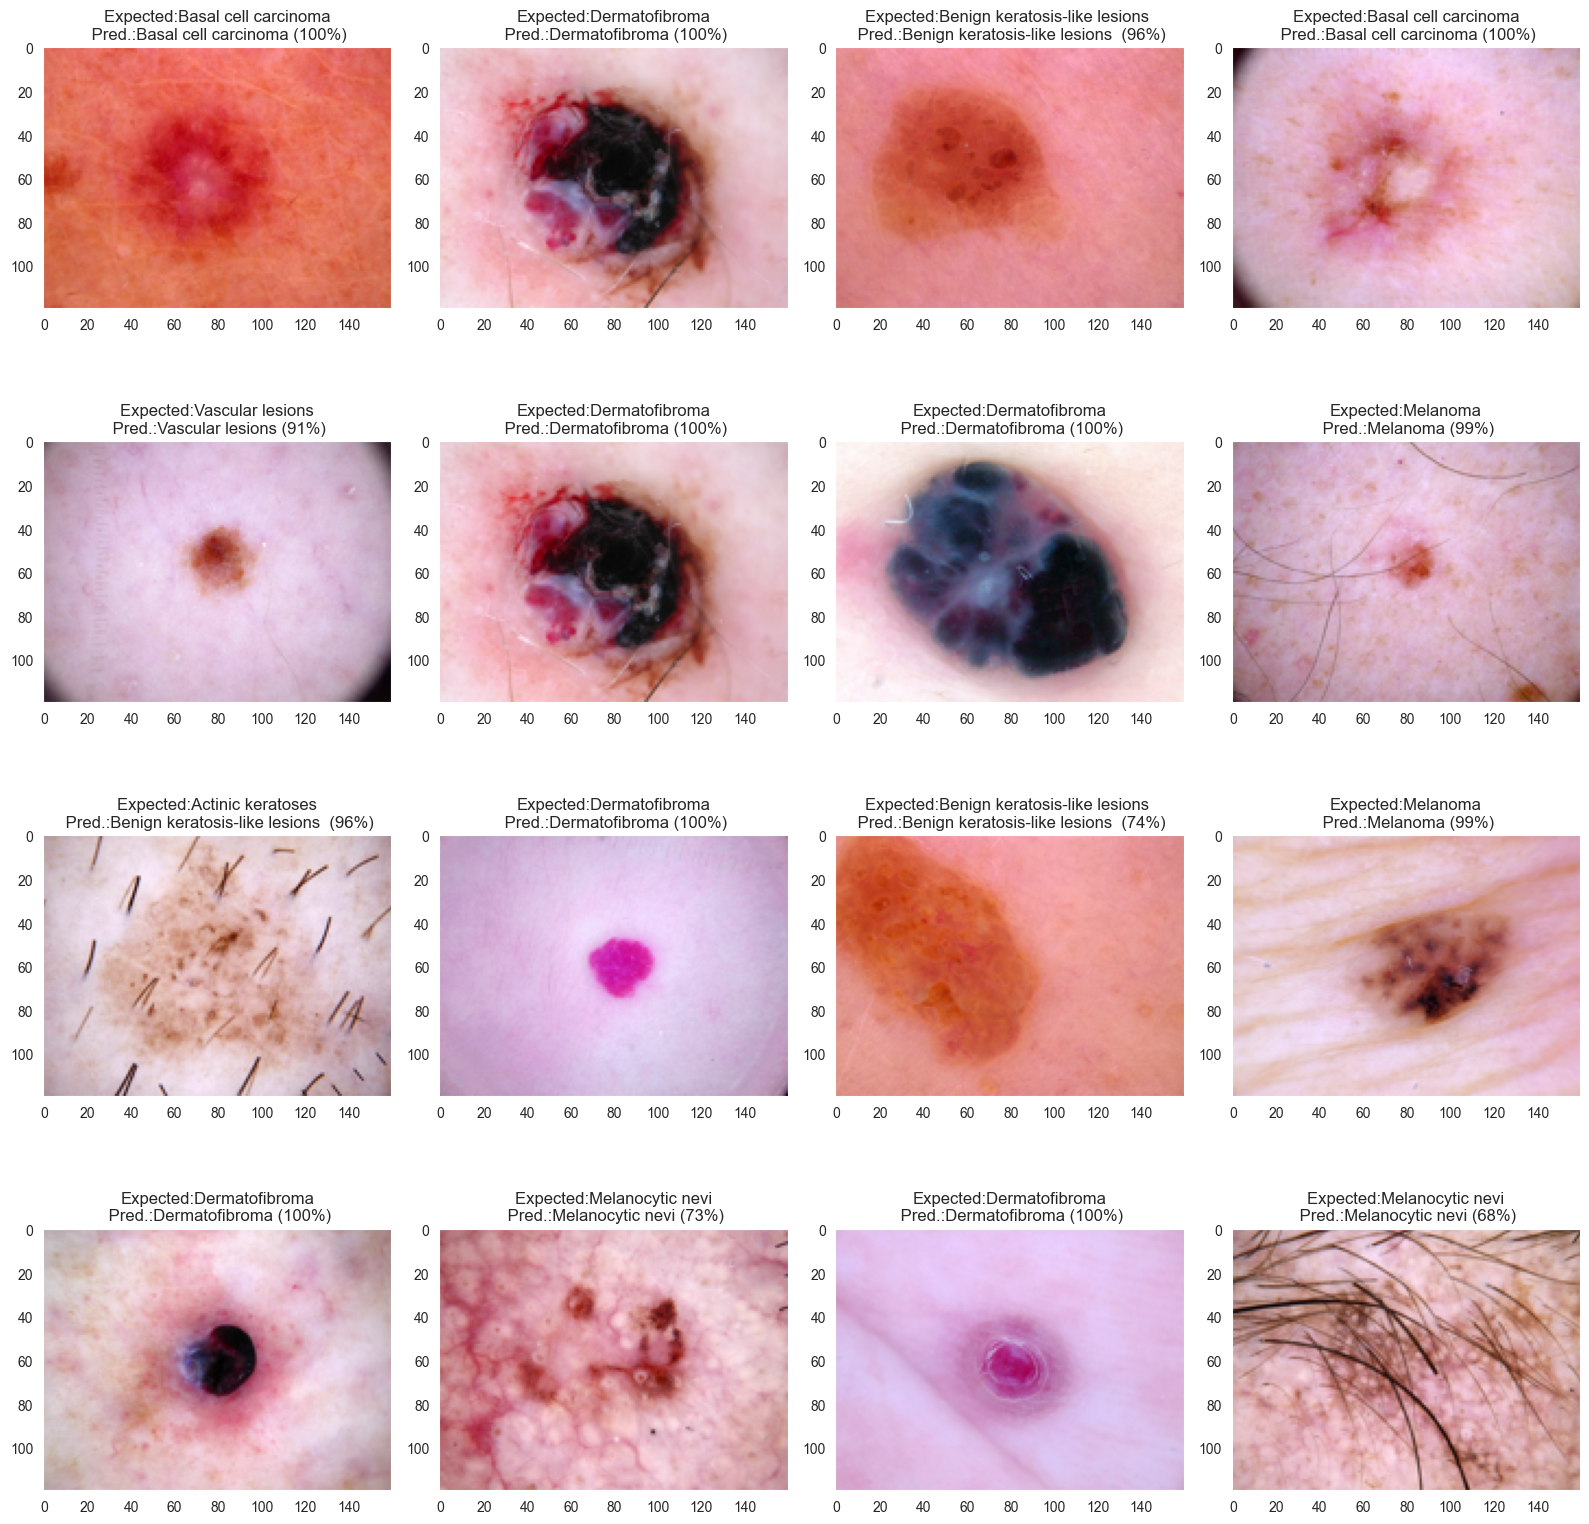

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    index = i + 100
    image_rgb = x_test[index].astype(np.float32)  # Convert image to float32
    image_rgb = (image_rgb - np.min(image_rgb)) / (np.max(image_rgb) - np.min(image_rgb))  # Normalize to 0-1 range
    plt.imshow(image_rgb)
    label_exp = lesion_names[y_true[index]]  # Expected label
    label_pred = lesion_names[y_pred[index]]  # Predicted label
    label_pred_prob = round(np.max(y_pred_prob[index]) * 100)
    plt.title('Expected:' + str(label_exp) + '\n Pred.:' + str(label_pred) + ' (' + str(label_pred_prob) + '%)')
    plt.grid(False)  # Remove grid
plt.ylabel('')
plt.tight_layout()
plt.show()

In [43]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_true, y_pred, target_names=targetNames, output_dict=True)

data = []
for class_name, metrics in report.items():
    if class_name != 'accuracy':  # Exclude accuracy metric
        data.append({
            'Class': class_name,
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1-score'],
            'Support': metrics['support']
        })

df = pd.DataFrame(data)
df.to_csv('../models/Reports/cnn_adam_111_classification_report.csv', index=False)

In [44]:
print(df.to_string(index=False))

                        Class  Precision   Recall  F1-Score  Support
            Actinic keratoses   0.861111 0.930000  0.894231      100
         Basal cell carcinoma   0.855670 0.912088  0.882979       91
Benign keratosis-like lesions   0.773196 0.675676  0.721154      111
               Dermatofibroma   0.916667 0.977778  0.946237       90
             Melanocytic nevi   0.765432 0.673913  0.716763       92
                     Melanoma   0.683673 0.697917  0.690722       96
             Vascular lesions   0.975610 1.000000  0.987654      120
                    macro avg   0.833051 0.838196  0.834248      700
                 weighted avg   0.836325 0.840000  0.836791      700


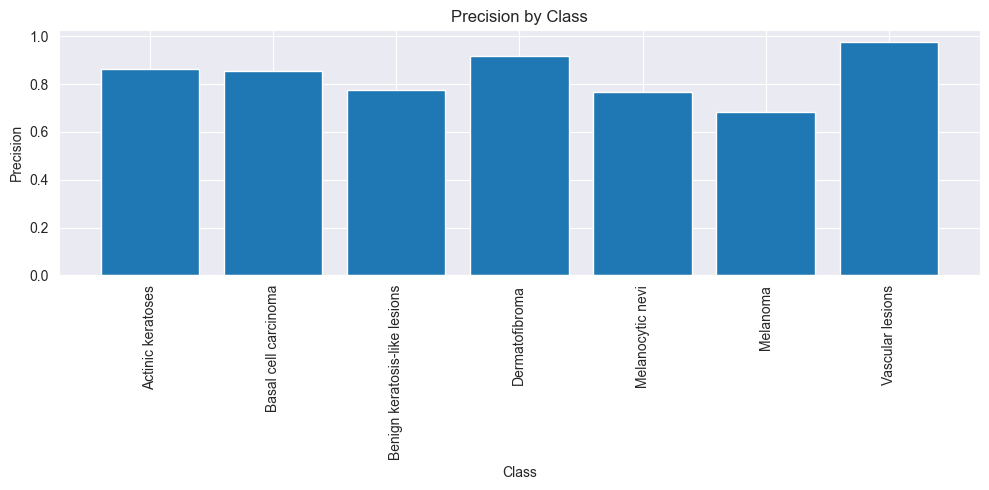

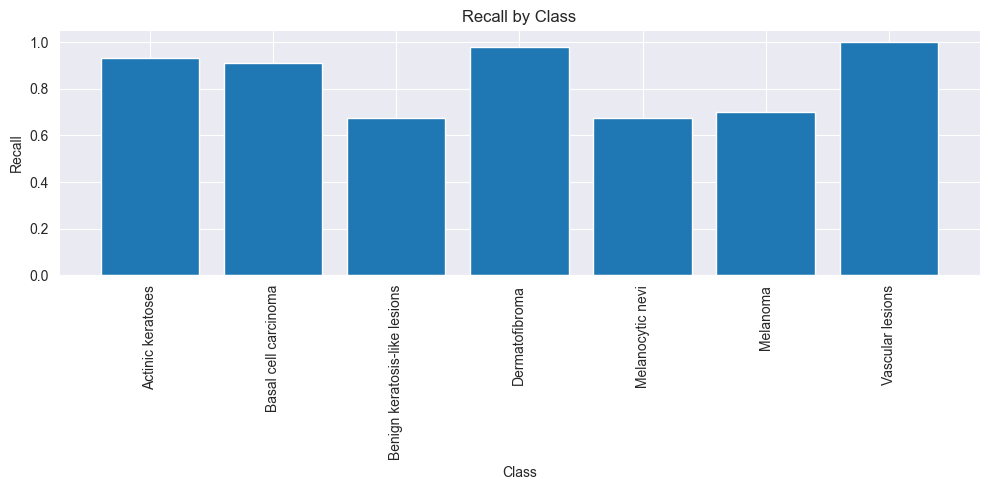

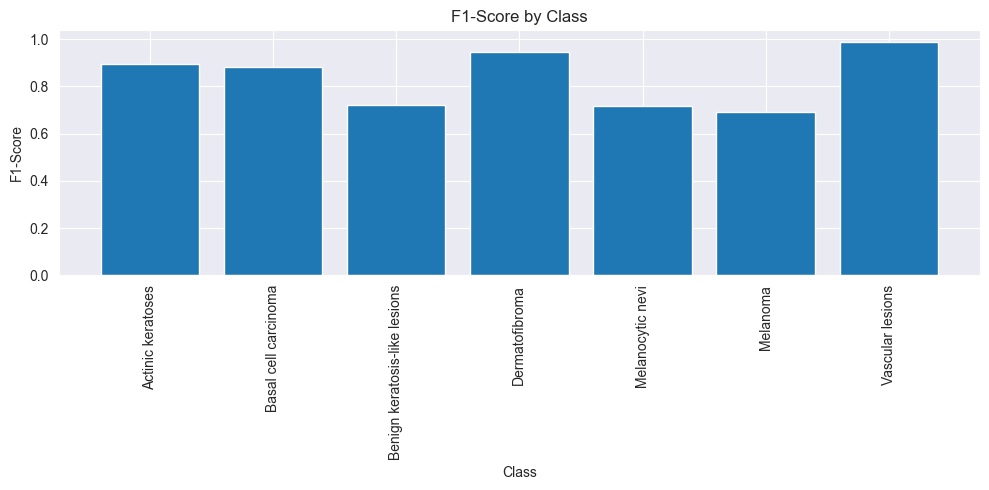

In [45]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

report = classification_report(y_true, y_pred, target_names=targetNames, output_dict=True)

data = []
for class_name, metrics in report.items():
    if class_name != 'accuracy' and class_name in targetNames[:7]:
        data.append({
            'Class': class_name,
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1-score'],
            'Support': metrics['support']
        })

df = pd.DataFrame(data)

# Plot Precision
plt.figure(figsize=(10, 5))
plt.bar(df['Class'], df['Precision'])
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision by Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot Recall
plt.figure(figsize=(10, 5))
plt.bar(df['Class'], df['Recall'])
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall by Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot F1-Score
plt.figure(figsize=(10, 5))
plt.bar(df['Class'], df['F1-Score'])
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('F1-Score by Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

df.to_csv('cnn_adam_111_classification_report.csv', index=False)